# Project: Investigate tmbd-movies database.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I'll provide a brief introduction to the dataset I've selected for analysis. At the end of this section, I wil describe the questions that I plan on exploring over the course of the report.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb
import datetime
from datetime import datetime


In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# cleaning the data 

In [4]:
df.drop([ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies'],axis=1,inplace=True)
# Droping the columns that we wouldn't need in the database
# Lets look at the new dataset
df.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [5]:
df.dropna(inplace=True)
# droping missing values

In [6]:
str_date=df.release_date
# making a list of the dates to convert
str_date=str_date.tolist()


In [7]:
# making a function to change the type to datetime and adding it to the data
def Release_date(date):
    for string in str_date:  
        new_release_date=datetime.strptime(string,'%m/%d/%y') 
        df['Release_Date']=new_release_date


In [8]:
Release_date(str_date)
df.drop('release_date',axis=1,inplace=True)
#droping the old date colomun 
                 

In [9]:
df.info()
# confirming the change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
Release_Date      10732 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


In [10]:
df.drop_duplicates(inplace = True)
#droping the duplicate row


In [11]:
df.info()
#confirming that the there is now missing data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
Release_Date      10731 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


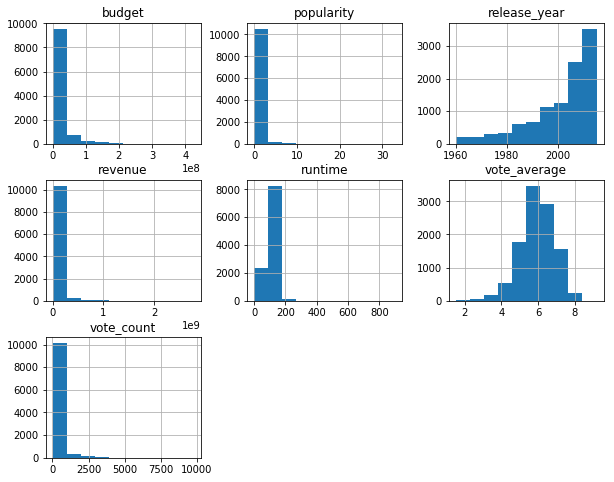

In [12]:
df.hist(figsize=(10,8));

In [13]:
df[df['budget']==0].shape[0]
# 0 value means that the value is missing

5578

In [14]:
df[df['revenue']==0].shape[0]
## 0 value means that the value is missing

5888

In [15]:
df[df['runtime']==0].shape[0]
## 0 value means that the value is missing

28

In [16]:
mean_runtime=df.runtime.mean().astype(int)
df['runtime'] = df['runtime'].replace(0, mean_runtime)
# replacing the missing values with the mean

In [17]:
mean=df.budget.mean().astype(int)
df['budget'] = df['budget'].replace(0, mean)
# replacing the missing values with the mean

In [18]:
mean_rev=df.revenue.mean().astype(int)
df['revenue'] = df['revenue'].replace(0, mean_rev)
# replacing the missing values with the mean

In [19]:
df['profit'] = df['revenue'] - df['budget']
# making a new column for profit
# Now that the data is clean we can Investigate .

**which movie made the most profit , the least profit , and what is the average profit for the movies?**

In [20]:
profit_mean=df.profit.mean().astype(int)
print('the average profit for the movies is {} $'.format(profit_mean))
#average profit for movies

the average profit for the movies is 39944417 $


In [21]:
df.loc[df['profit'].idxmax()]
#movie with most profit

popularity                                                  9.43277
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
Release_Date                                    2066-11-15 00:00:00
profit                                                   2544505847
Name: 1386, dtype: object

In [22]:
df.loc[df['profit'].idxmin()]
#movie with the lowest profit

popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
Release_Date                                    2066-11-15 00:00:00
profit                                                   -413912431
Name: 2244, dtype: object

the movie with the highest profit is : Avatar 
the movie with the lowest profit is : The warrior's way
the average profit for the movies is 39944417 $

**which movie had the largest budget , the smallest profit , and what is the average budget for the movies?**

In [23]:
df.loc[df['budget'].idxmax()]
#movie with highest budget


popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
Release_Date                                    2066-11-15 00:00:00
profit                                                   -413912431
Name: 2244, dtype: object

In [24]:
df.loc[df['budget'].idxmin()]
#movie with lowest budget


popularity                                                 0.177102
budget                                                            1
revenue                                                    40319887
original_title                                          Fear Clinic
cast              Thomas Dekker|Robert Englund|Cleopatra Coleman...
director                                                Robert Hall
runtime                                                          95
genres                                                       Horror
vote_count                                                       15
vote_average                                                    4.1
release_year                                                   2014
Release_Date                                    2066-11-15 00:00:00
profit                                                     40319886
Name: 1151, dtype: object

In [25]:
df.budget.mean()

22498617.478333801

• **the movie with the largest budget is : The Warrior's Way<br><br> 
• the movie with the least budget is : Fear Clinic<br><br>
• the average budget is : 22498617$** <br><br>

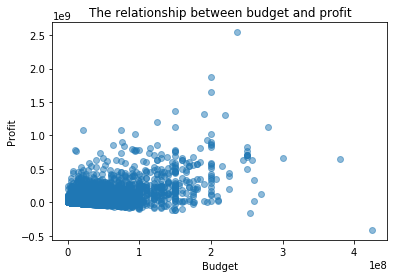

In [26]:
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("The relationship between budget and profit")
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.show();
# whats the relationship between budget and profit 

• Looks like there's no obvious relationship between them

**which movie had the highest revenue , the lowest revenue , and what is the average revenue for the movies?**

In [27]:
df.loc[df['revenue'].idxmax()]
#movie with the highest revenue

popularity                                                  9.43277
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
Release_Date                                    2066-11-15 00:00:00
profit                                                   2544505847
Name: 1386, dtype: object

In [28]:
df.loc[df['revenue'].idxmin()]
#movie with the lowest revenue


popularity                                                 0.462609
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                          94
genres                                                Drama|History
vote_count                                                       46
vote_average                                                    6.4
release_year                                                   2003
Release_Date                                    2066-11-15 00:00:00
profit                                                     -5999998
Name: 5067, dtype: object

In [29]:
df.revenue.mean()
#avarege movie revenue

62443034.979312271

• **the movie with the highest revenue is : Avatar<br><br>
• the movie with the lowest revenue is : Shattered Glass<br><br>
• the average revenue for a movie is : 62443035 $**

**which movie had the highest average rating , the lowest average rating ?**

In [30]:
df.loc[df['vote_average'].idxmax()]
#move with the highest vote_average

popularity                                                 0.006925
budget                                                     14803646
revenue                                                    40319887
original_title                        The Story of Film: An Odyssey
cast              Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                               Mark Cousins
runtime                                                         900
genres                                                  Documentary
vote_count                                                       14
vote_average                                                    9.2
release_year                                                   2011
Release_Date                                    2066-11-15 00:00:00
profit                                                     25516241
Name: 3894, dtype: object

In [31]:
df.loc[df['vote_average'].idxmin()]
#movie with the lowest vote_average

popularity                                                  0.12112
budget                                                     14803646
revenue                                                    40319887
original_title                                        Transmorphers
cast              Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director                                                Leigh Scott
runtime                                                          86
genres                             Action|Adventure|Science Fiction
vote_count                                                       10
vote_average                                                    1.5
release_year                                                   2007
Release_Date                                    2066-11-15 00:00:00
profit                                                     25516241
Name: 7772, dtype: object

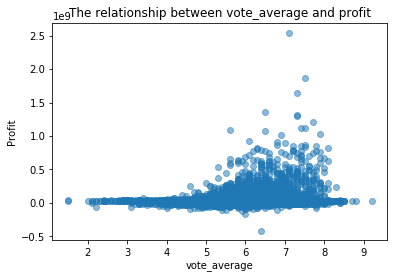

In [32]:
plt.xlabel("vote_average")
plt.ylabel("Profit")
plt.title("The relationship between vote_average and profit")
plt.scatter(df['vote_average'], df['profit'], alpha=0.5)
plt.show()
# whats the relationship between vote_average and profit 

• **It looks like movies with vote_average higher than 5 have a higher profit**

• **the movie with the highest vote_average is : The Story of Film: An Odyssey<br><br>
• the movie with the lowest vote_average is : Transmorphers**

**Question 1.2 Which movie had the greatest and least runtime?**

In [33]:
df.loc[df['runtime'].idxmax()]
# Movie with greatest runtime

popularity                                                 0.006925
budget                                                     14803646
revenue                                                    40319887
original_title                        The Story of Film: An Odyssey
cast              Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                               Mark Cousins
runtime                                                         900
genres                                                  Documentary
vote_count                                                       14
vote_average                                                    9.2
release_year                                                   2011
Release_Date                                    2066-11-15 00:00:00
profit                                                     25516241
Name: 3894, dtype: object

In [34]:
df.loc[df['runtime'].idxmin()]
# Movie with least runtime

popularity                                     0.202776
budget                                         14803646
revenue                                        40319887
original_title                     Batman: Strange Days
cast              Kevin Conroy|Brian George|Tara Strong
director                                     Bruce Timm
runtime                                               3
genres                                 Action|Animation
vote_count                                           20
vote_average                                        7.6
release_year                                       2014
Release_Date                        2066-11-15 00:00:00
profit                                         25516241
Name: 1112, dtype: object

In [35]:
df.runtime.mean()
#average runtime for a movie

102.73497344143136

• **Greatest runtime : he Story of Film: An Odyssey with 900 minutes<br><br>
• Leaset runtime :    Batman: Strange Days with 3 minutes<br><br>
• Average runtime for a movie is 103 minutes**<br><br>

**which movie had the most popularity**

In [36]:
df.loc[df['popularity'].idxmax()]
# Movie with greatest popularity

popularity                                                  32.9858
budget                                                    150000000
revenue                                                  1513528810
original_title                                       Jurassic World
cast              Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                            Colin Trevorrow
runtime                                                         124
genres                    Action|Adventure|Science Fiction|Thriller
vote_count                                                     5562
vote_average                                                    6.5
release_year                                                   2015
Release_Date                                    2066-11-15 00:00:00
profit                                                   1363528810
Name: 0, dtype: object

In [37]:
df.loc[df['popularity'].idxmin()]
# Movie with least popularity

popularity                                                 0.000188
budget                                                     14803646
revenue                                                    40319887
original_title                                         The Hospital
cast              George C. Scott|Diana Rigg|Richard Dysart|Barn...
director                                              Arthur Hiller
runtime                                                         103
genres                                         Mystery|Comedy|Drama
vote_count                                                       10
vote_average                                                    6.4
release_year                                                   1971
Release_Date                                    2066-11-15 00:00:00
profit                                                     25516241
Name: 9977, dtype: object

In [38]:
average_movies_popularity = df.groupby('release_year').agg({'popularity': ['mean']})
# average movie popularity per year


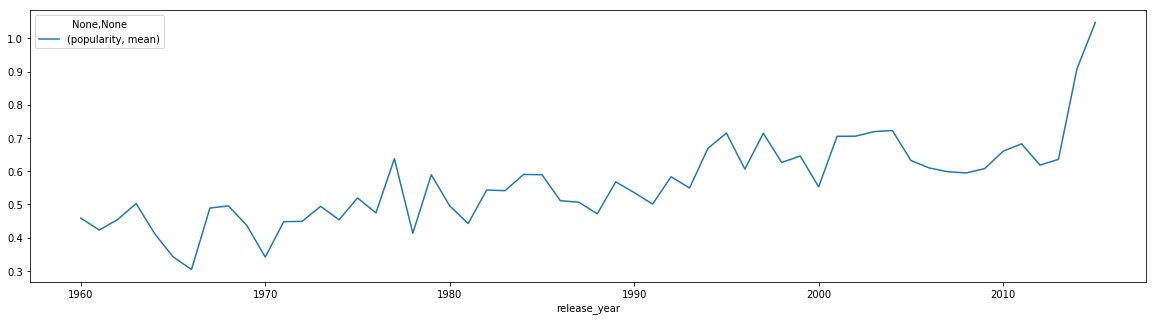

In [39]:
average_movies_popularity.plot(kind='line',figsize=(20,5));
#  popularity's trending over time 

**Looks like popularity of movies incresed over time.**

• **movie with the highest popularity : Jurassic World<br><br> 
• movie with the leaset popularity : The Hospital**<br><br>

**whar are the characteristics of movies with high profit ? <br><br>
• to answer this we'll only investigate movies with profit higher than average.**

In [40]:
df_hp=df[df['profit'] >= profit_mean]
# Making a new dataframe for movies with profit higher than average
df_hp

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,Release_Date,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,2066-11-15,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,2066-11-15,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,2066-11-15,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,2066-11-15,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,2066-11-15,1316249360
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,2066-11-15,397950503
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,2066-11-15,285603537
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,2066-11-15,487380321
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,2066-11-15,1082730962
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015,2066-11-15,678708609


In [41]:
df_hp.runtime.mean()
#the average runtime for movies with higher profit

111.29249706916764

In [42]:
df_hp.vote_average.mean()
#the average vote for movies with higher profit

6.3128956623681125

In [43]:
df_hp.budget.mean()
#avarege budget for high profit movies 

50839217.97127784

In [44]:
df_hp.revenue.mean()
#avarege revenue for high profit movies

214535330.53575614

• **Movies with high profit have a average runtime of 111 minutes <br><br>
• Movies with high profit have a average rating of 6.3<br><br>
• Movies with high profit have a average budget of 50839218 $**<br><br>


 **•Movies with high profit have a average revenue of 214535331 $**

**which directors had the most movies with high profit?**

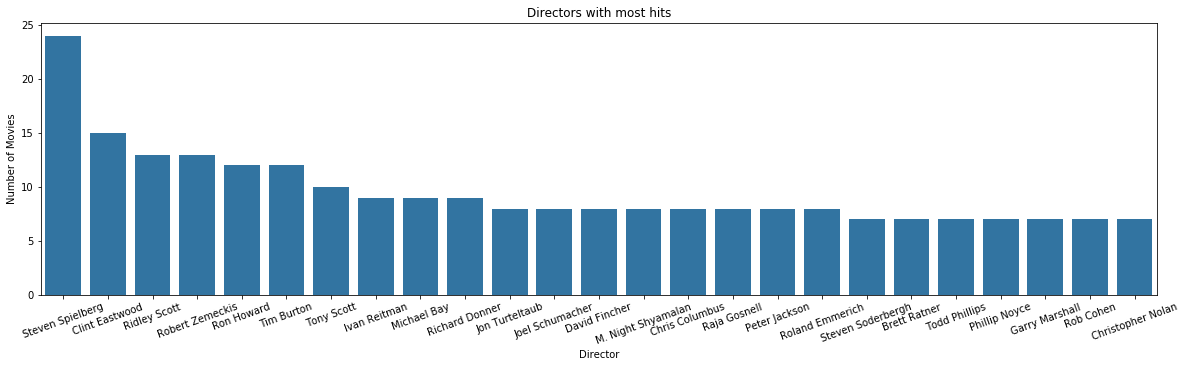

In [45]:
base_color=sb.color_palette()[0]
plt.figure(figsize=(20,5))
sb.countplot(data=df_hp,x='director',color=base_color,order=df_hp.director.value_counts().iloc[:25].index)
plt.title('Directors with most hits')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=20)
plt.show()

• Steven spielberg had the most with 24 movie.

**which genres are more common in high profit movies?**

In [46]:
genres_count = pd.Series(df_hp['genres'].str.cat(sep = '|').split('|'))
# Each movie has more than one genre so we separate them first.

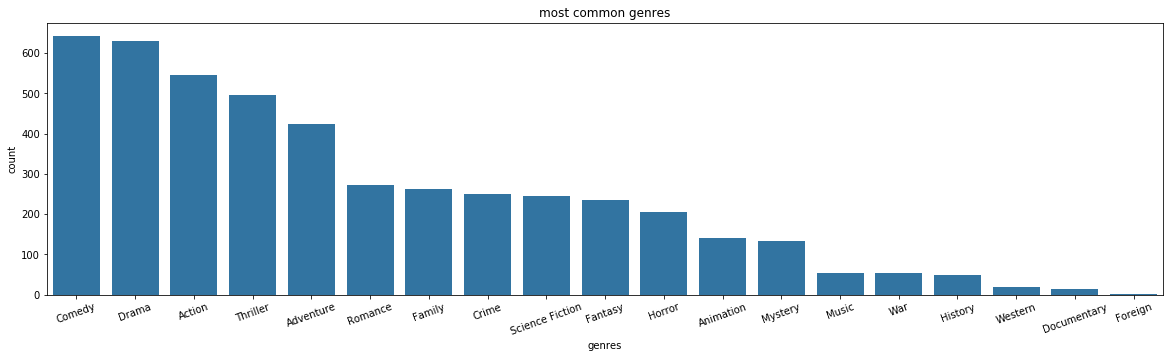

In [47]:
base_color=sb.color_palette()[0]
plt.figure(figsize=(20,5))
sb.countplot(genres_count,color=base_color,order= genres_count.value_counts().index)
plt.title('most common genres')
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(rotation=20)
plt.show()

Comedy and drama appear to be most common.

**which actors were most present in movies with high profit ?**

In [52]:
actors_count = pd.Series(df_hp['cast'].str.cat(sep = '|').split('|'))
# Each movie cast had move than one actor so we had to separate them first

In [53]:
actors_count

0               Chris Pratt
1       Bryce Dallas Howard
2               Irrfan Khan
3         Vincent D'Onofrio
4             Nick Robinson
5                 Tom Hardy
6           Charlize Theron
7          Hugh Keays-Byrne
8            Nicholas Hoult
9               Josh Helman
10         Shailene Woodley
11               Theo James
12             Kate Winslet
13             Ansel Elgort
14             Miles Teller
15            Harrison Ford
16              Mark Hamill
17            Carrie Fisher
18              Adam Driver
19             Daisy Ridley
20               Vin Diesel
21              Paul Walker
22            Jason Statham
23       Michelle Rodriguez
24           Dwayne Johnson
25        Leonardo DiCaprio
26                Tom Hardy
27             Will Poulter
28         Domhnall Gleeson
29            Paul Anderson
               ...         
8469            Nick Castle
8470           John Belushi
8471           Tim Matheson
8472            John Vernon
8473            Vern

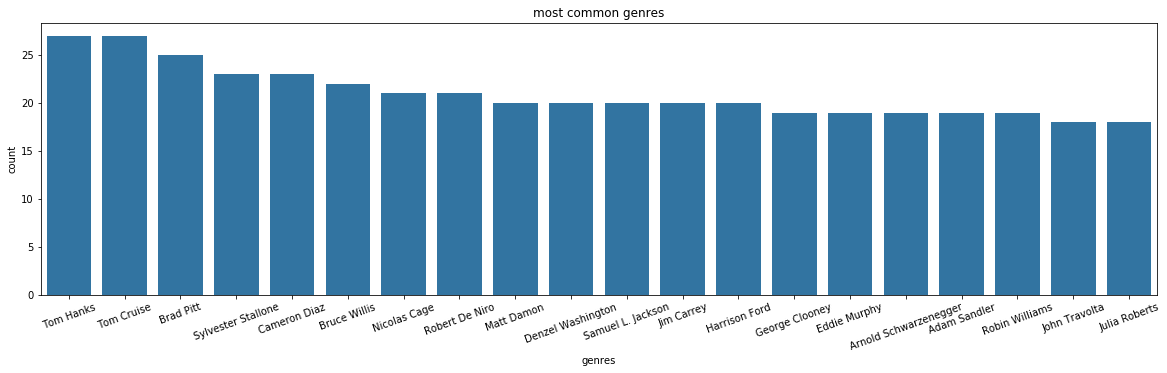

In [56]:
base_color=sb.color_palette()[0]
plt.figure(figsize=(20,5))
sb.countplot(actors_count,color=base_color,order= actors_count.value_counts().iloc[:20].index)
plt.title('most common genres')
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(rotation=20)
plt.show()

Both Tom Cruise and Tom Hanks appeard 27 times 

<font size="5"> 
In conclusion:

</font>

<font size="3"> 


• **Movies with genres (comedy, drama, action) are more likly to make more profit<br><br>
• Movies directed by steven spielberg, clint eastwood or ridley scott are more likly to make more profit<br><br>
• the top casts for movies are (Tom Cruse, Tom Hanks, Brag Pitt, Sylvester Stallone, Cameron Diaz)<br><br>
• Movies with high profit have a average runtime of 111 minutes <br><br>
• Movies with high profit have a average rating of 6.3<br><br>
• Movies with high profit have a average budget of 50839218 dollar<br><br>
• Movies with high profit have a average revenue of 214535331 dollar**</font><br><br>